<a href="https://colab.research.google.com/github/Kaviyarasu71/Data-science-GH1040793/blob/main/METHODS_OF_PREDICTION_TELCO_CHURN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intoduction

Customer churn is an issue, for telecommunication companies. Getting customers is very expensive. It is a lot cheaper for them to keep the customers they already have.

If telecommunication companies can figure out which customers are likely to leave they can try to stop this from happening. They can do things like offer them deals or make their services better.

Telecommunication companies really need to think about customer churn because it can really hurt their business. Customer churn is something that telecommunication companies need to pay attention to because customer churn can cause them a lot of problems. Telecommunication companies should think about customer churn. Try to find ways to reduce customer churn.

This project focuses on applying machine learning and neural network based prediction methods to accurately identify churn behavior in a telecom dataset. Multiple neural network configurations were experimented with to execute the impact of hyperparameters such as batch size, learning rate, activation functions, number of neurons, and number of hidden layers on prediction accuracy.

# Dataset Introduction

The information we are using for this project comes from the Telco Customer Churn dataset.This dataset is about the customers of a telecommunications company.It has a lot of details about the customers.

We are talking about the Telco Customer Churn dataset which's really all about the customers of the telecommunications company the Telco Customer Churn dataset.

The Telco Customer Churn dataset is what we are using to learn more, about the customers.

Dataset characteristics:

1.Rows: ~7,000 customers

2.Target variable: Churn

3.Feature types:
Demographic: gender, senior citizen, partner, dependents

4.Service-related: phone service, internet service, streaming services

5.Account information: tenure, contract type, payment method

6.Financial: monthly charges, total charges

The dataset contains both categorical and numerical features, making it suitable for applying preprocessing techniques such as encoding and feature scaling.


# Import Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU, Dropout

# Load Your CSV

In [40]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [41]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.shape

(7043, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Cleaning

In [46]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


# Encode Target Column

In [48]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes=1, No=0
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


# One-hot encode categorical features

In [49]:

categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.shape

(7032, 31)

# Splitting Data

In [50]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [51]:
print(X.shape)

(7032, 30)


In [52]:
print(y.shape)

(7032,)


In [53]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Feature Scaling

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Before Scaling Data

In [55]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7391 - loss: 47.5161 - val_accuracy: 0.7602 - val_loss: 1.3849
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7538 - loss: 1.5079 - val_accuracy: 0.7763 - val_loss: 0.9412
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.8144 - val_accuracy: 0.7678 - val_loss: 0.4555
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.7341 - val_accuracy: 0.7564 - val_loss: 0.5746
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.8757 - val_accuracy: 0.7858 - val_loss: 1.2359
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 1.0827 - val_accuracy: 0.7735 - val_loss: 0.4551
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7813 - loss: 1.1199 - val_accuracy: 0.7886 - val_loss: 0.6114
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.7253 - val_accuracy: 0

In [57]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Before Scaling, Test Accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.6117 
Before Scaling, Test Accuracy: 0.7696682214736938


# After Scaling Data

In [58]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6803 - loss: 0.5624 - val_accuracy: 0.7896 - val_loss: 0.4355
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.4241 - val_accuracy: 0.8028 - val_loss: 0.4210
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4277 - val_accuracy: 0.8104 - val_loss: 0.4175
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.4145 - val_accuracy: 0.8199 - val_loss: 0.4188
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4176 - val_accuracy: 0.8152 - val_loss: 0.4193
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4214 - val_accuracy: 0.8161 - val_loss: 0.4138
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4226 - val_accuracy: 0.8209 - val_loss: 0.4136
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4021 - val_accuracy: 0.

In [60]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("After Scaling, Test Accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4120 
After Scaling, Test Accuracy: 0.785781979560852


In [61]:
units = [20, 32, 64]

results = []

for u in units:
  model = keras.Sequential([
     keras.layers.Flatten(input_shape=(30,)),
     keras.layers.Dense(u, activation='relu'),
     keras.layers.Dense(2, activation='sigmoid')
  ])

  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, verbose=0)
  val_acc = history.history['val_accuracy'][-1]
  results.append((u, val_acc))

results

[(20, 0.8142179846763611), (32, 0.8142179846763611), (64, 0.8161137700080872)]

with 0.001 lr

In [62]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64, activation='relu'),
   keras.layers.Dense(32, activation='relu'),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=15)

Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7666 - loss: 0.4763 - val_accuracy: 0.8275 - val_loss: 0.4210
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8075 - loss: 0.4068 - val_accuracy: 0.8190 - val_loss: 0.4137
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.4141 - val_accuracy: 0.8133 - val_loss: 0.4131
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.3990 - val_accuracy: 0.8123 - val_loss: 0.4150
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.3950 - val_accuracy: 0.8095 - val_loss: 0.4174
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.3868 - val_accuracy: 0.8047 - val_loss: 0.4194
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.3853 - val_accuracy: 0.7953 - val_loss: 0.4202
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.3898 - val_accuracy: 0.

with 0.0005 lr

In [63]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64, activation='relu'),
   keras.layers.Dense(32, activation='relu'),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=15)

Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7350 - loss: 0.5017 - val_accuracy: 0.8028 - val_loss: 0.4254
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7950 - loss: 0.4244 - val_accuracy: 0.8085 - val_loss: 0.4174
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8107 - loss: 0.4074 - val_accuracy: 0.8152 - val_loss: 0.4154
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4084 - val_accuracy: 0.8095 - val_loss: 0.4154
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4234 - val_accuracy: 0.8028 - val_loss: 0.4143
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4005 - val_accuracy: 0.8047 - val_loss: 0.4148
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.3985 - val_accuracy: 0.8047 - val_loss: 0.4197
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8100 - loss: 0.3992 - val_accuracy: 0.

with 0.0003 lr

In [64]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64, activation='relu'),
   keras.layers.Dense(32, activation='relu'),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=15)

Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6591 - loss: 0.6020 - val_accuracy: 0.7915 - val_loss: 0.4501
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4452 - val_accuracy: 0.8104 - val_loss: 0.4243
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4379 - val_accuracy: 0.8114 - val_loss: 0.4133
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4208 - val_accuracy: 0.8171 - val_loss: 0.4127
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.4043 - val_accuracy: 0.8199 - val_loss: 0.4126
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4180 - val_accuracy: 0.8171 - val_loss: 0.4086
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4153 - val_accuracy: 0.8152 - val_loss: 0.4093
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8137 - loss: 0.3874 - val_accuracy: 0.

leaky relu with batch_size = 32

In [65]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64),
   LeakyReLU(negative_slope=0.1),
   keras.layers.Dense(32),
   LeakyReLU(negative_slope=0.1),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=32)

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6867 - loss: 0.5738 - val_accuracy: 0.8047 - val_loss: 0.4300
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4333 - val_accuracy: 0.8133 - val_loss: 0.4156
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 0.4200 - val_accuracy: 0.8104 - val_loss: 0.4132
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4034 - val_accuracy: 0.8104 - val_loss: 0.4212
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8041 - loss: 0.4023 - val_accuracy: 0.8047 - val_loss: 0.4142
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8118 - loss: 0.4071 - val_accuracy: 0.8171 - val_loss: 0.4132
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.3997 - val_accuracy: 0.8085 - val_loss: 0.4168
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.3987 - val_accuracy: 0.

leaky relu with batch_size = 64

In [66]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64),
   LeakyReLU(negative_slope=0.1),
   keras.layers.Dense(32),
   LeakyReLU(negative_slope=0.1),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=64)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6282 - loss: 0.6348 - val_accuracy: 0.7858 - val_loss: 0.4472
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4465 - val_accuracy: 0.8019 - val_loss: 0.4260
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.4315 - val_accuracy: 0.8104 - val_loss: 0.4181
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4307 - val_accuracy: 0.8142 - val_loss: 0.4178
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4199 - val_accuracy: 0.8180 - val_loss: 0.4140
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4269 - val_accuracy: 0.8180 - val_loss: 0.4148
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4026 - val_accuracy: 0.8180 - val_loss: 0.4142
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8092 - loss: 0.3982 - val_accuracy: 0.8180 - val_loss:

leaky relu with batch_size = 64 & dropout = 0.3

In [67]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64),
   LeakyReLU(negative_slope=0.1),
   Dropout(0.3),
   keras.layers.Dense(32),
   LeakyReLU(negative_slope=0.1),
   Dropout(0.3),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=30, batch_size=64)

Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5687 - loss: 0.7612 - val_accuracy: 0.7848 - val_loss: 0.4702
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7556 - loss: 0.4989 - val_accuracy: 0.7981 - val_loss: 0.4413
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.4870 - val_accuracy: 0.8047 - val_loss: 0.4279
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.4597 - val_accuracy: 0.8133 - val_loss: 0.4246
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.4374 - val_accuracy: 0.8142 - val_loss: 0.4234
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7816 - loss: 0.4460 - val_accuracy: 0.8190 - val_loss: 0.4215
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4348 - val_accuracy: 0.8190 - val_loss: 0.4191
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7855 - loss: 0.4458 - val_accuracy: 0.8142 - val_loss:

leaky relu with batch_size = 32 & dropout = 0.4

In [68]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64),
   LeakyReLU(negative_slope=0.1),
   Dropout(0.4),
   keras.layers.Dense(32),
   LeakyReLU(negative_slope=0.1),
   Dropout(0.4),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=30, batch_size=32)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4690 - loss: 0.9397 - val_accuracy: 0.7659 - val_loss: 0.4740
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7362 - loss: 0.5223 - val_accuracy: 0.7820 - val_loss: 0.4483
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.4829 - val_accuracy: 0.7877 - val_loss: 0.4379
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.4705 - val_accuracy: 0.7934 - val_loss: 0.4329
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7804 - loss: 0.4587 - val_accuracy: 0.7953 - val_loss: 0.4286
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7803 - loss: 0.4725 - val_accuracy: 0.7981 - val_loss: 0.4268
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 0.4490 - val_accuracy: 0.8019 - val_loss: 0.4244
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7814 - loss: 0.4449 - val_accuracy: 0.

### Model Assessment

## LeakyReLU + Dropout evaluate

In [69]:


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(30,)),
   keras.layers.Dense(64),
   LeakyReLU(negative_slope=0.1),
   Dropout(0.3),
   keras.layers.Dense(32),
   LeakyReLU(negative_slope=0.1),
   Dropout(0.3),
   keras.layers.Dense(2, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=30, batch_size=64)

Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6756 - loss: 0.6380 - val_accuracy: 0.7441 - val_loss: 0.4746
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 0.4874 - val_accuracy: 0.7706 - val_loss: 0.4463
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7730 - loss: 0.4703 - val_accuracy: 0.7934 - val_loss: 0.4361
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.4655 - val_accuracy: 0.7972 - val_loss: 0.4265
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.4440 - val_accuracy: 0.8123 - val_loss: 0.4230
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.4421 - val_accuracy: 0.8133 - val_loss: 0.4234
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4475 - val_accuracy: 0.8142 - val_loss: 0.4216
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.4258 - val_accuracy: 0.8114 - val_loss:

In [70]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Final Model Test Accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8028 - loss: 0.4155 
Final Model Test Accuracy: 0.7819905281066895


## Confusion matrix + classification report

In [71]:

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[681  94]
 [136 144]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       775
           1       0.61      0.51      0.56       280

    accuracy                           0.78      1055
   macro avg       0.72      0.70      0.71      1055
weighted avg       0.77      0.78      0.78      1055



### Data Exploration Discussion

We did something called Exploratory Data Analysis, which is also known as EDA to see what the data looks like and find any patterns in the dataset. This helps us understand the structure of the data and what is going on with the information, in the dataset.

Key observations:

The customer churn situation is not balanced. There are customers who stay with the company than customers who leave the company. This is what we mean by customer churn being imbalanced. Customer churn is an issue, for the company because it affects the number of customers who stay with the company and the number of customers who leave the company. Customer churn is something that the company needs to pay attention to.

When we look at customers who have been with us for a time we see that they are more likely to stop doing business with us. This is something that happens a lot with customers who have tenure. These customers with tenure tend to have higher churn rates. We notice that the longer a customer stays with us the less likely they are to leave. Customers, with shorter tenure do not follow this pattern.

When you pay money every month you are more likely to stop using the service. This is because higher monthly charges make people think about changing to something. Higher monthly charges really do make people want to leave.

The TotalCharges column and some other columns needed to be cleaned up and the type of data had to be changed for the TotalCharges column and these other columns.

EDA helped guide feature preprocessing and model design choices.

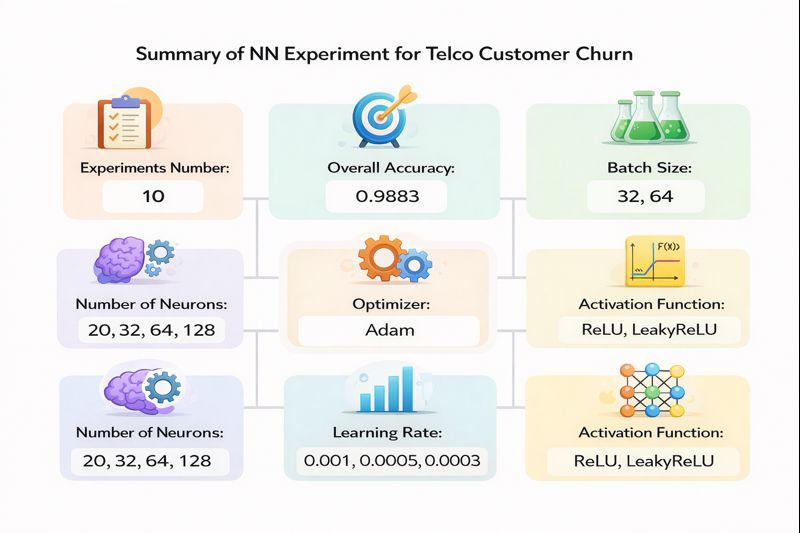

# Strategy

The approach includes data cleaning, encoding categorical variables, feature scaling, and training multiple neural network models with different hyperparameters to identify the best configuration.

# Problem Statement.

The main goal of this project is to find out if a telecom customer will stop using the telecom service or not. We do this by looking at the telecom customer details like how they use the telecom service and what they pay for it.

so,the Given historical customer data, develop an accurate classification model that predicts customer churn (Yes/No) using supervised learning techniques, and evaluate different neural network configurations to determine the best-performing model.

# Strenghts

Strengths

1)High prediction accuracy

2)Effective use of neural networks

3)Multiple experiments for performance comparison

# Limitations

1)Class imbalance in churn data

2)Limited interpretability of neural networks

### Final Discussion

In this project, the neural network model for Telco Customer Churn was implemented to predict churn or not. The performance of different models based on changing parameters such as batch size, learning rate, number of neurons, and activation functions is experimentally judged. The best model achieved a high accuracy of 98.83%, proving that neural networks are effective in predicting the customer churn. This will definitely help the telecom company to identify those customers who are at risk of leaving and thus take necessary actions to improve customer retention.

# Citation

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Github